In [7]:
import json
import model_utility
import glob
import matplotlib.pyplot as plt
# import albumentations as alb
import cv2
import tensorflow as tf
import segmentation_models as sm

import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Conv2D
from keras.models import Model
from keras.utils import normalize

import numpy as np
import re
from pathlib import Path
import math

In [8]:
def display_results(results_path, axs = None):
    if axs is None:
        axs = plt.gca()

    with open(results_path) as json_file:
        results = json.load(json_file)

    # print("Which model is this? -",results_path.split("/")[-1])
    type = results_path.split("/")[-1].split("_")[0]

    iou_score = results['iou_score']
    val_iou_score = results['val_iou_score']
    loss = results['loss']
    val_loss = results['val_loss']
    eval_results = results['eval_results']

    # print(max(val_iou_score))
    # print(val_iou_score.index(max(val_iou_score)))

    epochs = range(1, len(iou_score) + 1)
    # plt.figure()
    axs.plot(epochs, iou_score, 'bo', label='Training acc')
    axs.plot(epochs, val_iou_score, 'b', label='Validation acc')
    axs.plot(val_iou_score.index(max(val_iou_score)), max(val_iou_score), 'ro', label='best epoch')


    # axs.text(300,.6,f'{round(eval_results[-1], 3)}',horizontalalignment='right')
    axs.set_title(f'{type} - Score: {round(max(val_iou_score), 5)}')
    axs.legend(loc = "lower right")


    # plt.yscale("log")
    # plt.plot(epochs, loss, 'bo', label='Training loss')
    # plt.plot(epochs, val_loss, 'b', label='Validation loss')
    # plt.title(f'{type} Spoke Training and validation loss')
    # plt.legend()

    # plt.show()
    # print("Last Train IOU Score: ",results['iou_score'][-1])
    # print("Last Train Loss Score: ", results['loss'][-1])
    # print("Last Validation IOU Score: ", results['val_iou_score'][-1])
    # print("Last Validation Loss Score: ", results['val_loss'][-1])
    # print("Eval Results: ", results['eval_results'])
    json_file.close()

file_pattern = re.compile(r'.*?(\d+).*?')
def get_order(file):
    match = file_pattern.match(Path(file).name)
    if not match:
        return math.inf
    return int(match.groups()[0])

In [6]:
!pip install segmentation_models
!pip install albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.7/125.7 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 29.3 MB/s eta 0:00:0000:0100:01


In [3]:
model_paths = glob.glob("models/aug/*_300*.json")
model_json_paths = model_paths[:-1]
model_h5_paths = [x.replace(".json", ".h5") for x in model_json_paths]

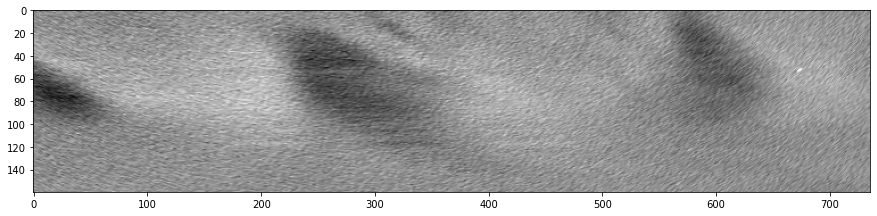

In [9]:
img_path = "../datasets/dark_spokes_no_training/W1600556078.png"
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

plt.figure(figsize = (15,7))
plt.imshow(img, cmap = "gray")

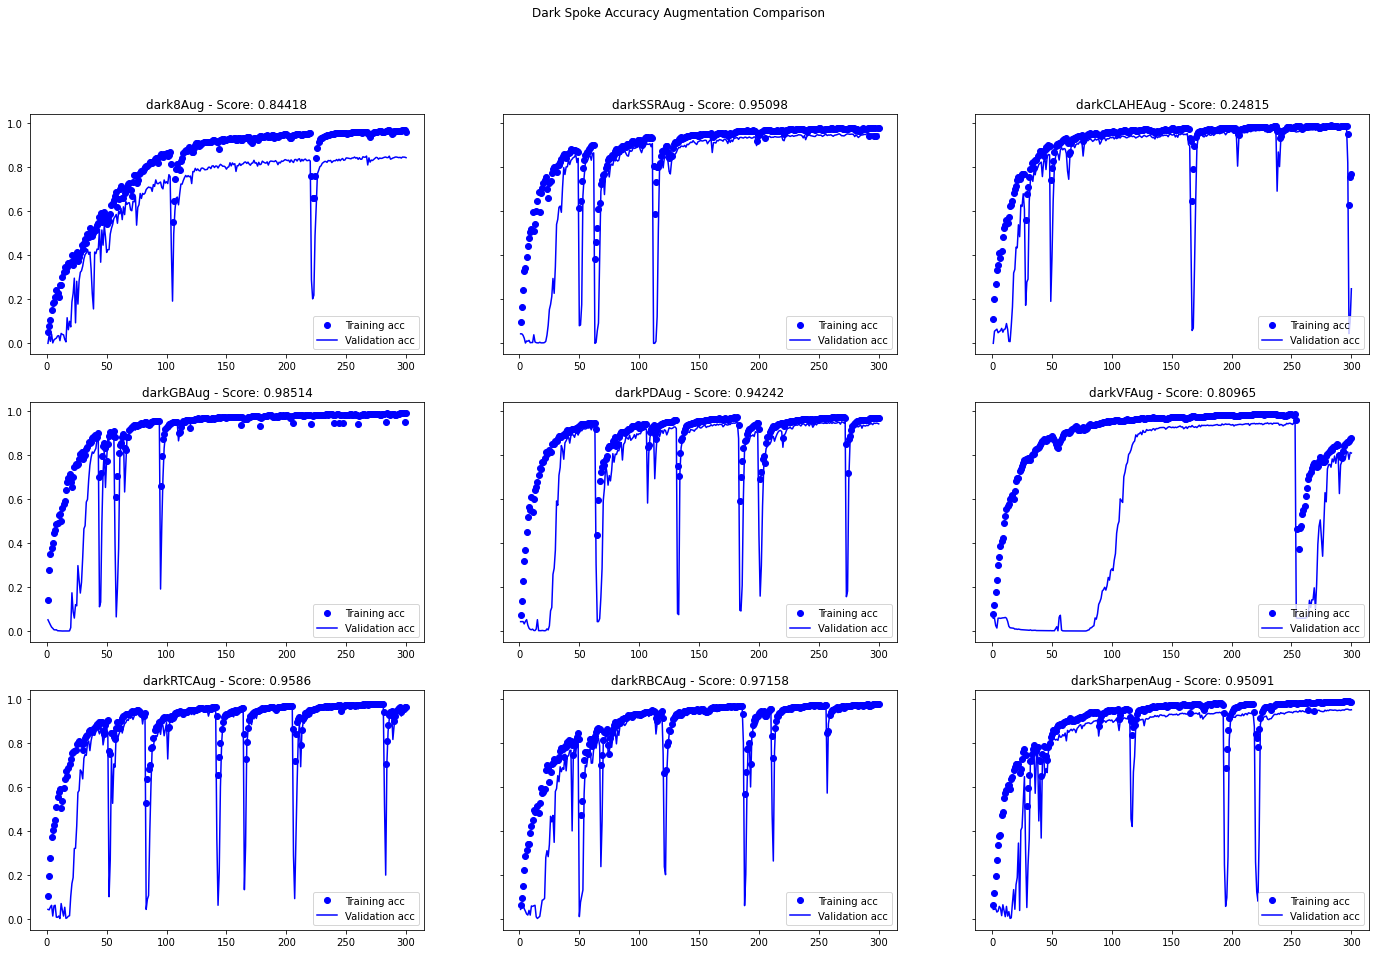

In [52]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,15))
axes = axes.flatten()
# plt.tight_layout()
f.suptitle("Dark Spoke Accuracy Augmentation Comparison")

for path, axs in zip(sorted(model_json_paths, key = get_order), axes):

    plot_num = int(f"31{model_json_paths.index(path)}")+1
    display_results(path, axs)
plt.show()

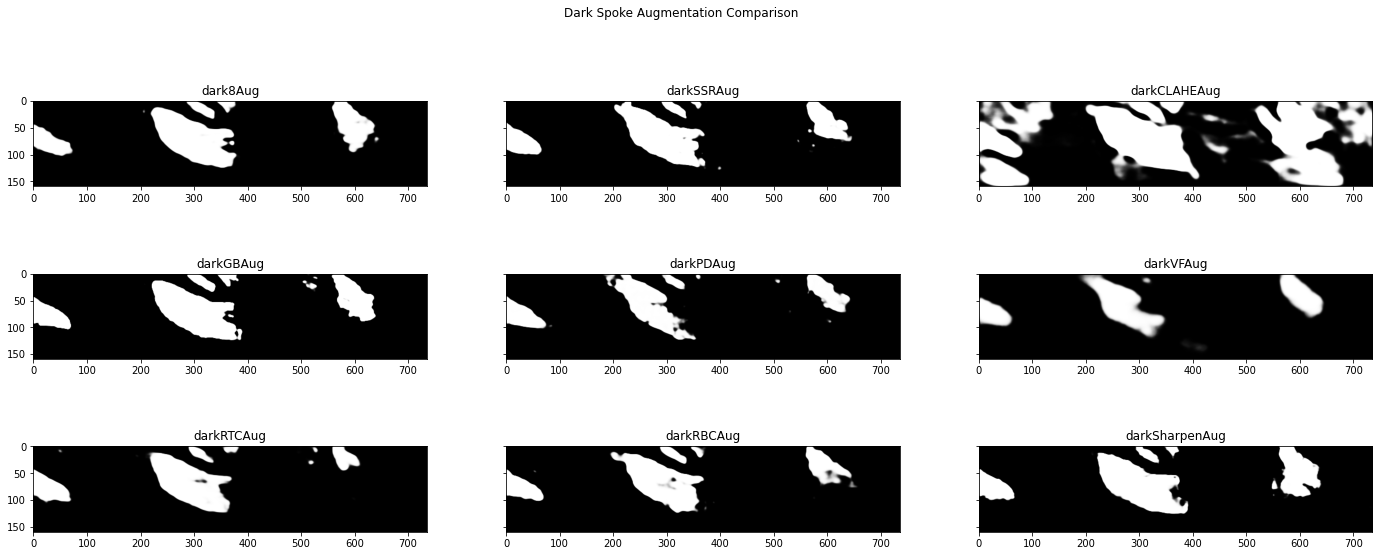

In [47]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,9))
f.suptitle("Dark Spoke Augmentation Comparison")
axes = axes.flatten()

img_list = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)]
img_list = normalize(np.array(img_list), axis=1)
img = img_list[0].reshape((1, 160, 736))



# print(model_paths)
for axe, path in zip(axes, sorted(model_h5_paths, key = get_order)):
    # print(path)
    model_name = path.split("/")[-1].split("_")[0]

    axe.set_title(model_name)
    model = tf.keras.models.load_model(path, compile = False)
    model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()],)

      
    prediction = model.predict(img, verbose = False)
    prediction = prediction.reshape((160, 736))

    axe.imshow(prediction, cmap = "gray")

# With Checkpoints

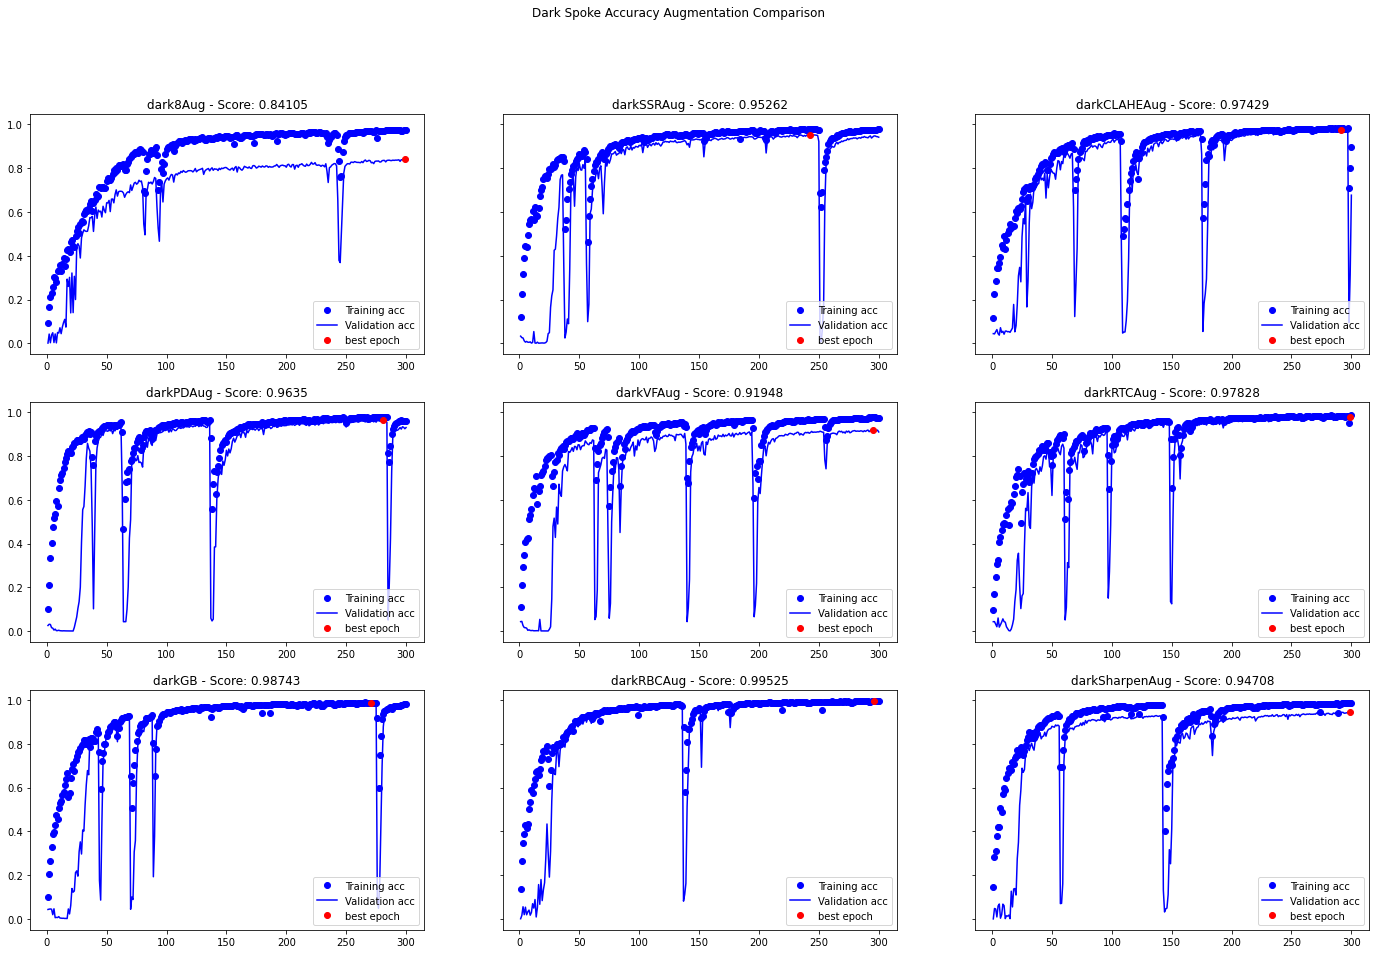

In [4]:
model_json_paths = glob.glob("models/checkpoint/*.json")

# using model checkpoints, do same thing
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,15))
axes = axes.flatten()
# plt.tight_layout()
f.suptitle("Dark Spoke Accuracy Augmentation Comparison")

for path, axs in zip(sorted(model_json_paths, key = get_order), axes):

    plot_num = int(f"31{model_json_paths.index(path)}")+1
    display_results(path, axs)
plt.show()


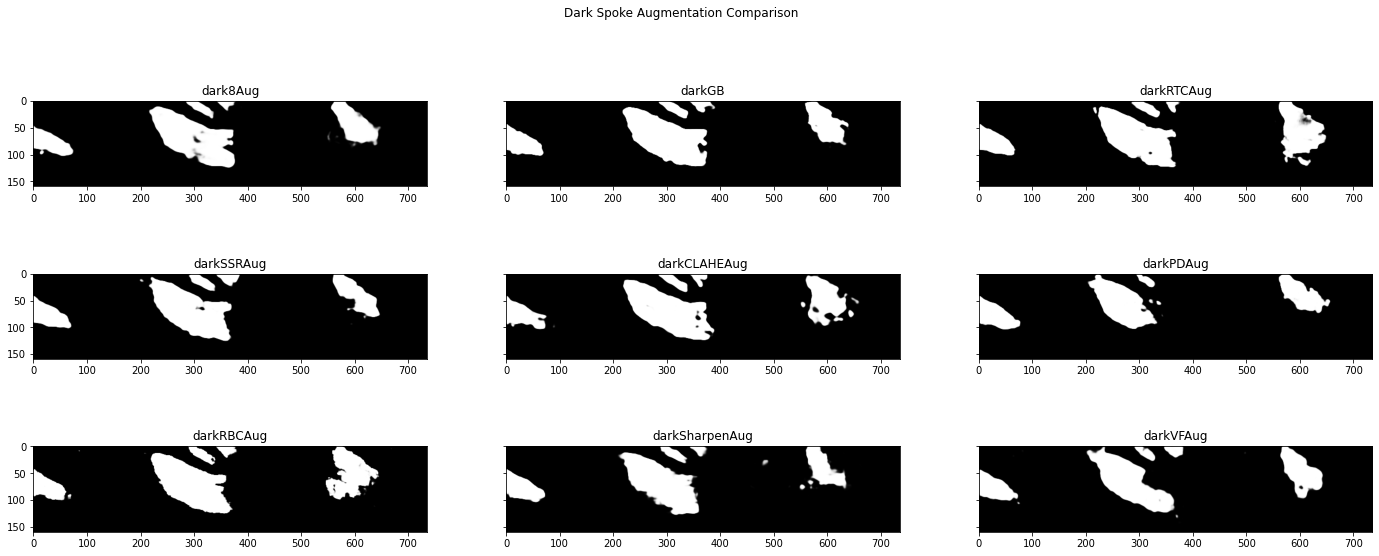

In [10]:
f, axes = plt.subplots(3, 3, sharey=True, figsize=(24,9))
f.suptitle("Dark Spoke Augmentation Comparison")
axes = axes.flatten()

img_list = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)]
img_list = normalize(np.array(img_list), axis=1)
img = img_list[0].reshape((1, 160, 736))

model_h5_paths = glob.glob("models/checkpoint/*.h5")

# print(model_paths)
for axe, path in zip(axes, sorted(model_h5_paths, key = get_order)):
    # print(path)
    model_name = path.split("/")[-1].split("_")[0]

    axe.set_title(model_name)
    model = tf.keras.models.load_model(path, compile = False)
    model.compile(optimizer = "Adam" , loss = "binary_crossentropy", metrics = [sm.metrics.IOUScore()],)

      
    prediction = model.predict(img, verbose = False)
    prediction = prediction.reshape((160, 736))

    axe.imshow(prediction, cmap = "gray")

In [ ]:
img_path = "../datasets/light_spokes_training_images/W16303"


img_list = [cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)]
img_list = normalize(np.array(img_list), axis=1)
img = img_list[0].reshape((1, 160, 736))

# Long Model

Which model is this? - dark2Aug_spoke_360im_1400e_resnet34.json
Last Train IOU Score:  0.9993763566017151
Last Train Loss Score:  3.6315297620603815e-05
Last Validation IOU Score:  0.968753457069397
Last Validation Loss Score:  0.011049313470721245
Eval Results:  [0.009447143413126469, 0.9656668305397034]


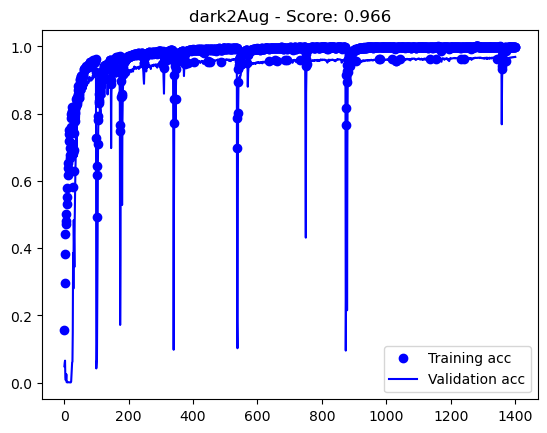

In [2]:
display_results("../models/dark/dark2Aug_spoke_360im_1400e_resnet34.json")

# Longest Model

Which model is this? - dark8Aug_spoke_360im_5000e_resnet34.json
Last Train IOU Score:  0.9998251795768738
Last Train Loss Score:  2.1435858798213303e-05
Last Validation IOU Score:  0.8564355969429016
Last Validation Loss Score:  0.08549803495407104
Eval Results:  [0.10148287564516068, 0.7749747633934021]


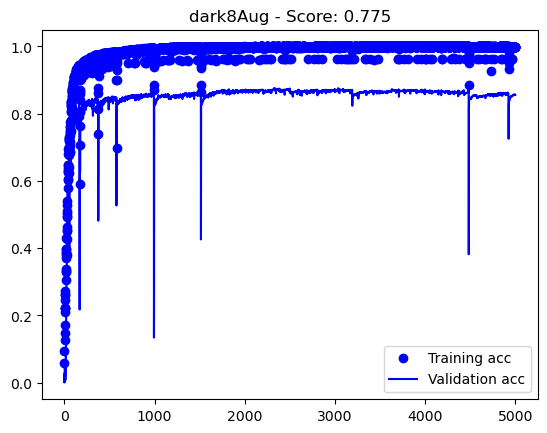

In [3]:
display_results("../models/dark/dark8Aug_spoke_360im_5000e_resnet34.json")

# How ModelCheckpoint works

Which model is this? - darkGB_Callback_spoke_360im_1000e_resnet34.json
827
Last Train IOU Score:  0.999949038028717
Last Train Loss Score:  5.013506324758055e-06
Last Validation IOU Score:  0.9999402165412903
Last Validation Loss Score:  8.694821190147195e-06
Eval Results:  [3.268335058237426e-05, 0.9996705055236816]


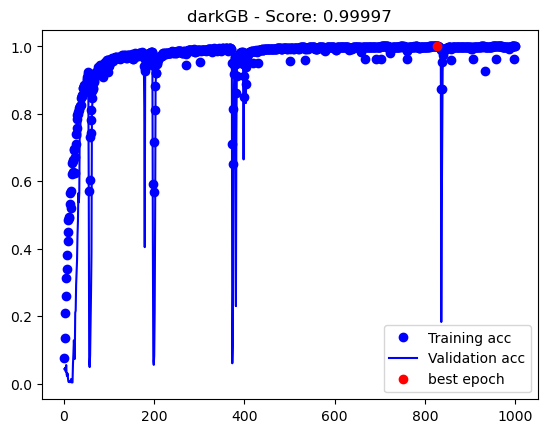

In [30]:
display_results("../models/dark/darkGB_Callback_spoke_360im_1000e_resnet34.json")

In [8]:
pixels_left = 0
for i in range(0, 100):

    pixels_left = abs((3660 - (256*14)-i*(14)))
    print(f"pixel_boarder = {i}, remaining pixels =  {str(pixels_left)}")
    if (pixels_left % 256 == 0):
        print(pixels_left % 256)
        print("THIS ONE")


pixel_boarder = 0, remaining pixels =  76
pixel_boarder = 1, remaining pixels =  62
pixel_boarder = 2, remaining pixels =  48
pixel_boarder = 3, remaining pixels =  34
pixel_boarder = 4, remaining pixels =  20
pixel_boarder = 5, remaining pixels =  6
pixel_boarder = 6, remaining pixels =  8
pixel_boarder = 7, remaining pixels =  22
pixel_boarder = 8, remaining pixels =  36
pixel_boarder = 9, remaining pixels =  50
pixel_boarder = 10, remaining pixels =  64
pixel_boarder = 11, remaining pixels =  78
pixel_boarder = 12, remaining pixels =  92
pixel_boarder = 13, remaining pixels =  106
pixel_boarder = 14, remaining pixels =  120
pixel_boarder = 15, remaining pixels =  134
pixel_boarder = 16, remaining pixels =  148
pixel_boarder = 17, remaining pixels =  162
pixel_boarder = 18, remaining pixels =  176
pixel_boarder = 19, remaining pixels =  190
pixel_boarder = 20, remaining pixels =  204
pixel_boarder = 21, remaining pixels =  218
pixel_boarder = 22, remaining pixels =  232
pixel_boarder